<a href="https://colab.research.google.com/github/gibiee/Measure_BoneAge/blob/master/%EB%BC%88%20%EB%82%98%EC%9D%B4%20%EC%B8%A1%EC%A0%95(%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%A7%8C%20%EC%82%AC%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -q "./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/BoneAge_Dataset.zip" -d dataset
!ls

dataset  drive	sample_data


In [2]:
import tensorflow as tf

# model = tf.keras.applications.Xception(weights=None, include_top=True, input_shape=(224,224,1), classes=1, classifier_activation=None)
model = tf.keras.applications.InceptionV3(weights=None, include_top=True, input_shape=(224,224,1), classes=1, classifier_activation=None)

# print(model.summary())

In [ ]:
# # 각 레이어에서 어떤 activation function을 쓰는지 확인
# for layer in model.layers :
#     try :
#         print(layer.activation)
#     except:
#         print("Activation function 없음")

In [3]:
model.compile(loss='mae', optimizer='adam')

In [4]:
import pandas as pd

csv_train = pd.read_csv("./dataset/train_csv.csv")
csv_train.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [5]:
for i in range(len(csv_train)) :
    csv_train.loc[i,"id"] = f"{csv_train['id'][i]}.png"
    
csv_train.head()

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_dataframe(csv_train, directory="./dataset/train/", x_col='id', y_col='boneage',
                                               target_size=(224, 224), color_mode='grayscale', class_mode='raw', subset='training')

valid_generator = datagen.flow_from_dataframe(csv_train, directory="./dataset/train/", x_col='id', y_col='boneage',
                                               target_size=(224, 224), color_mode='grayscale', class_mode='raw', subset='validation', shuffle=False)

# test_generator = datagen.flow_from_dataframe(csv_test, directory="./dataset/test/", x_col='id', y_col='boneage',
#                                               color_mode='grayscale', class_mode='raw')

Found 10089 validated image filenames.
Found 2522 validated image filenames.


In [7]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', save_best_only=True,
                                                filepath="./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint.h5")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 조기종료 콜백함수 정의

history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=100, callbacks=[checkpoint, early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
316/316 [==============================] - ETA: 0s - loss: 43.8624WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint/assets
316/316 [==============================] - 413s 1s/step - loss: 43.8624 - val_loss: 36.9460
Epoch 2/100
316/316 [==============================] - 354s 1s/step - loss: 22.4659 - val_loss: 41.0777
Epoch 3/100
316/316 [==============================] - 340s 1s/step - loss: 19.2707 - val_l

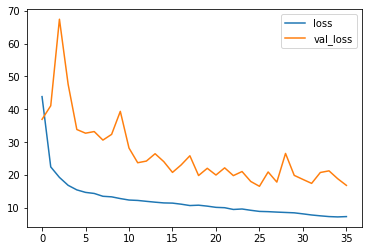

In [8]:
# 학습 과정에서의 loss와 val_loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
# print(model.metrics_names)
# model.evaluate_generator(valid_generator)

In [9]:
# 예측값과 정답값을 비교
load_model = tf.keras.models.load_model("./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint.h5")

predict = load_model.predict_generator(valid_generator).flatten()

compare = pd.DataFrame({"id" : valid_generator.filenames,
                        "예측" : predict,
                        "정답" : valid_generator.labels})
compare.head(20)

Instructions for updating:
Please use Model.predict, which supports generators.


,id,예측,정답
0,1377.png,219.340897,180
1,1378.png,58.574917,12
2,1379.png,134.329346,94
3,1380.png,170.277374,120
4,1381.png,67.160378,82
5,1382.png,145.077469,138
6,1383.png,154.963150,150
7,1384.png,153.818405,156
8,1385.png,35.961021,36
9,1387.png,137.022186,138


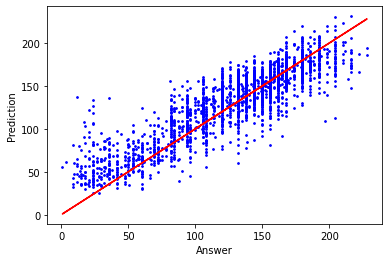

In [10]:
# 최종 결과값과 예측값 비교 시각화
import matplotlib.pyplot as plt

plt.scatter(valid_generator.labels, predict, color='b', s=3)
plt.plot(valid_generator.labels, valid_generator.labels, 'r')
plt.xlabel("Answer")
plt.ylabel("Prediction")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# x = [10, 20, 30, 40, 50] # 정답
# y = [11, 23, 28, 38, 55] # 예측

# plt.scatter(x, y, color='b')
# plt.plot(x, x, 'r')
# plt.xlabel("Answer")
# plt.ylabel("Prediction")
# plt.show()